# K-FCA Semiring Comparison: Simple Vehicle Example

This notebook demonstrates three different semiring approaches to K-Formal Concept Analysis using the same 5×4 vehicle dataset.

## Goal
Compare how **Boolean**, **Max-Plus**, and **Fuzzy** semirings handle continuous-valued data and form concepts.

## Dataset
- **5 vehicles** (objects): Car, Boat, Bicycle, Helicopter, Bus
- **4 attributes**: goes_fast, is_big, has_motor, is_transport
- **Values**: Continuous [0, 0.25, 0.5, 0.75, 1.0] representing degree of membership

In [1]:
# Setup
import sys
sys.path.insert(0, '..')

import numpy as np
import matplotlib.pyplot as plt
from src.context import KValuedContext
from src.galois import GaloisConnection
from src.lattice import ConceptLattice
from src.semirings import BooleanSemiring, MaxPlusSemiring, FuzzySemiring
from src.visualization import plot_context, plot_lattice

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

## 1. Dataset Definition

We define a simple 5×4 vehicle dataset with continuous values representing degrees of membership.

In [2]:
# Define vehicles (objects)
vehicles = ["Car", "Boat", "Bicycle", "Helicopter", "Bus"]

# Define attributes
attributes = ["goes_fast", "is_big", "has_motor", "is_transport"]

# Continuous-valued relation matrix
# Values represent degree of membership in [0, 1]
relation = np.array([
    # fast   big   motor  transport
    [1.00,  0.50,  1.00,  1.00],  # Car
    [0.50,  0.50,  1.00,  1.00],  # Boat
    [0.25,  0.00,  0.00,  1.00],  # Bicycle
    [0.75,  0.50,  1.00,  1.00],  # Helicopter
    [0.50,  1.00,  1.00,  1.00],  # Bus
], dtype=object)

print("Vehicle Dataset (5 vehicles × 4 attributes)")
print("=" * 60)
print()

# Display as table
import pandas as pd
df = pd.DataFrame(relation, index=vehicles, columns=attributes)
print(df)
print()
print("Values represent degree of membership: 0 (not at all) to 1 (fully)")

Vehicle Dataset (5 vehicles × 4 attributes)

           goes_fast is_big has_motor is_transport
Car              1.0    0.5       1.0          1.0
Boat             0.5    0.5       1.0          1.0
Bicycle         0.25    0.0       0.0          1.0
Helicopter      0.75    0.5       1.0          1.0
Bus              0.5    1.0       1.0          1.0

Values represent degree of membership: 0 (not at all) to 1 (fully)


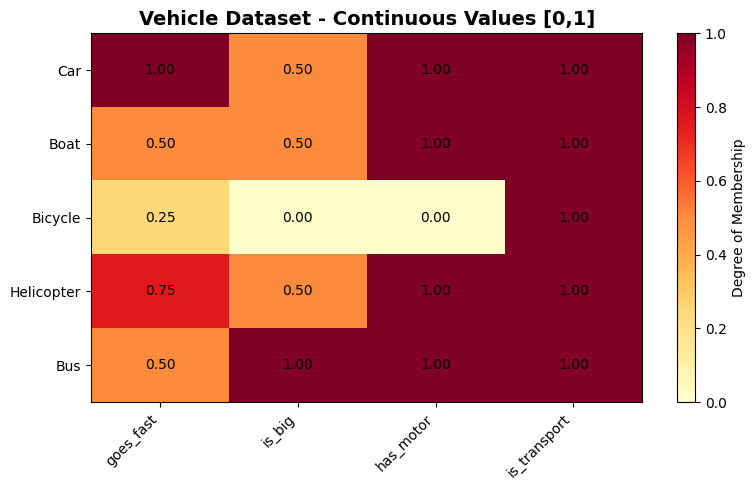

In [3]:
# Visualize the dataset as a heatmap (using matplotlib)
plt.figure(figsize=(8, 5))

# Convert to float for visualization
relation_float = relation.astype(float)
im = plt.imshow(relation_float, cmap='YlOrRd', aspect='auto', vmin=0, vmax=1)

# Add colorbar
cbar = plt.colorbar(im, label='Degree of Membership')

# Add value annotations
for i in range(len(vehicles)):
    for j in range(len(attributes)):
        text = plt.text(j, i, f'{relation[i, j]:.2f}',
                       ha="center", va="center", color="black", fontsize=10)

# Set ticks and labels
plt.xticks(range(len(attributes)), attributes, rotation=45, ha='right')
plt.yticks(range(len(vehicles)), vehicles)
plt.title('Vehicle Dataset - Continuous Values [0,1]', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 2. Boolean Semiring (Standard FCA)

**Approach**: Convert continuous values to binary using threshold φ = 0.75

**Semiring**: Boolean = ({0,1}, max, min, 0, 1)
- ⊕ (addition): max (OR)
- ⊗ (multiplication): min (AND)

**Threshold**: Values ≥ 0.75 → 1, otherwise → 0

In [4]:
# Convert to binary using threshold
threshold = 0.75
binary_relation = (relation >= threshold).astype(object).astype(int)

print(f"Binary Relation (threshold φ = {threshold})")
print("=" * 60)
print()

df_binary = pd.DataFrame(binary_relation, index=vehicles, columns=attributes)
print(df_binary)
print()
print("✓ Values ≥ 0.75 become 1")
print("✗ Values < 0.75 become 0")

Binary Relation (threshold φ = 0.75)

            goes_fast  is_big  has_motor  is_transport
Car                 1       0          1             1
Boat                0       0          1             1
Bicycle             0       0          0             1
Helicopter          1       0          1             1
Bus                 0       1          1             1

✓ Values ≥ 0.75 become 1
✗ Values < 0.75 become 0


In [5]:
# Create Boolean context
boolean_semiring = BooleanSemiring()
boolean_context = KValuedContext(vehicles, attributes, binary_relation, boolean_semiring)

print("Boolean Context:")
print(boolean_context)

Boolean Context:
K-Valued Formal Context
Semiring: BooleanSemiring(B, ∨, ∧, 0, 1)

             | goes_fast |  is_big  | has_motor | is_transport
--------------------------------------------------------------
Car          |    1     |    0     |    1     |    1    
Boat         |    0     |    0     |    1     |    1    
Bicycle      |    0     |    0     |    0     |    1    
Helicopter   |    1     |    0     |    1     |    1    
Bus          |    0     |    1     |    1     |    1    


In [6]:
# Build concept lattice
boolean_galois = GaloisConnection(boolean_context, pivot=1)
boolean_lattice = ConceptLattice(boolean_context, boolean_galois, method="objects")

print(f"Boolean Semiring: Found {len(boolean_lattice)} concepts")
print("=" * 60)
print()

# Display all concepts
for i in range(len(boolean_lattice)):
    objs = boolean_lattice.get_concept_objects(i)
    attrs = boolean_lattice.get_concept_attributes(i)
    
    print(f"Concept #{i}:")
    print(f"  Extent (Vehicles):   {objs if objs else '∅'}")
    print(f"  Intent (Attributes): {attrs if attrs else '∅'}")
    print()

Boolean Semiring: Found 5 concepts

Concept #0:
  Extent (Vehicles):   ['Car', 'Boat', 'Bicycle', 'Helicopter', 'Bus']
  Intent (Attributes): ['is_transport']

Concept #1:
  Extent (Vehicles):   ['Car', 'Helicopter']
  Intent (Attributes): ['goes_fast', 'has_motor', 'is_transport']

Concept #2:
  Extent (Vehicles):   ['Car', 'Boat', 'Helicopter', 'Bus']
  Intent (Attributes): ['has_motor', 'is_transport']

Concept #3:
  Extent (Vehicles):   ['Bus']
  Intent (Attributes): ['is_big', 'has_motor', 'is_transport']

Concept #4:
  Extent (Vehicles):   ∅
  Intent (Attributes): ['goes_fast', 'is_big', 'has_motor', 'is_transport']



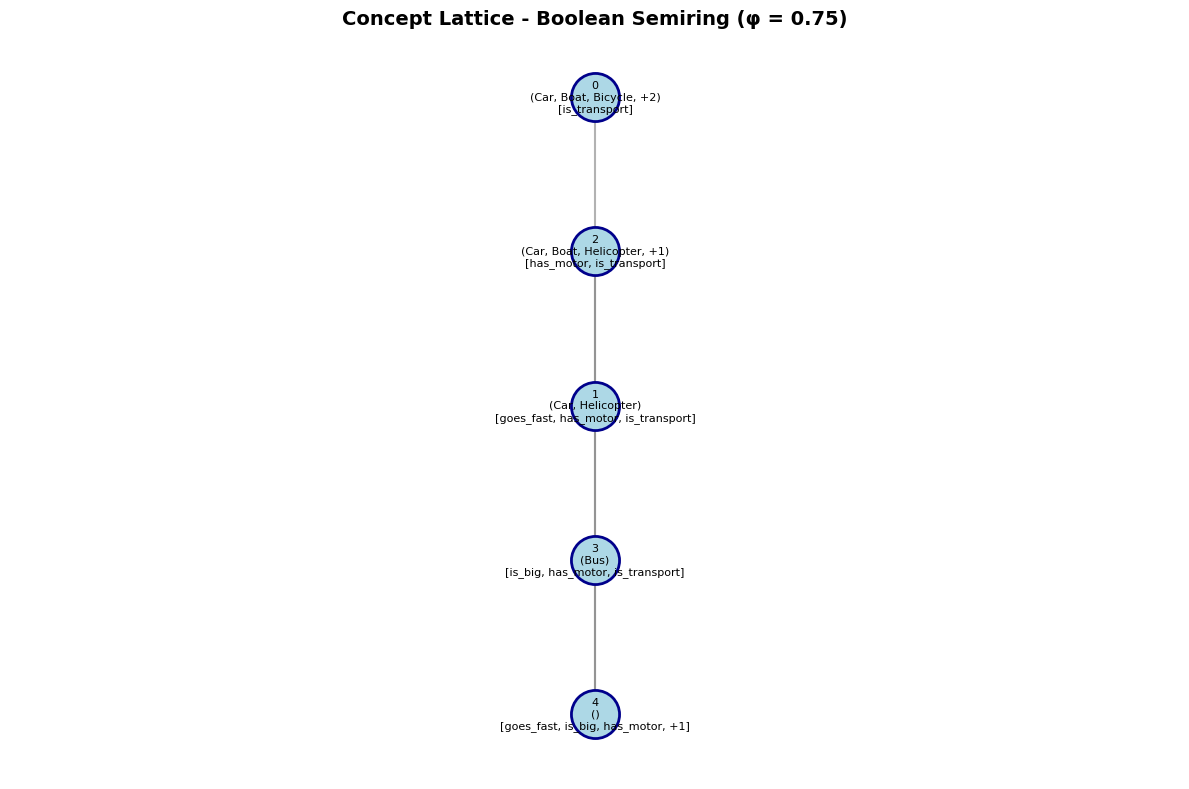

In [7]:
# Visualize Boolean lattice
fig = plot_lattice(boolean_lattice, figsize=(12, 8), layout="hierarchical",
                   title="Concept Lattice - Boolean Semiring (φ = 0.75)")
plt.tight_layout()
plt.show()

### Boolean Analysis

**Key Observations**:
- Binary discretization: values become 0 or 1
- **Information loss**: 0.50 and 0.25 both become 0
- Car and Helicopter have identical binary profiles: [1,0,1,1]
- Simple and interpretable
- Standard FCA approach

## 3. Max-Plus Semiring (Tropical)

**Approach**: Transform continuous values to log-scale

**Semiring**: Max-Plus = (ℝ∪{-∞,∞}, max, +, -∞, 0)
- ⊕ (addition): max
- ⊗ (multiplication): + (regular addition)

**Transformation**: log(value) for value > 0, -∞ for value = 0

**Pivot**: φ = log(0.75) ≈ -0.288

In [8]:
# Transform to log-scale for Max-Plus
maxplus_relation = np.zeros_like(relation, dtype=object)

for i in range(relation.shape[0]):
    for j in range(relation.shape[1]):
        val = float(relation[i, j])
        if val == 0:
            maxplus_relation[i, j] = float('-inf')
        else:
            maxplus_relation[i, j] = np.log(val)

print("Max-Plus Transformation (log-scale)")
print("=" * 60)
print()

df_maxplus = pd.DataFrame(maxplus_relation, index=vehicles, columns=attributes)
print(df_maxplus)
print()
print("Transformation mapping:")
print(f"  1.00 → {np.log(1.0):.3f}")
print(f"  0.75 → {np.log(0.75):.3f}")
print(f"  0.50 → {np.log(0.5):.3f}")
print(f"  0.25 → {np.log(0.25):.3f}")
print(f"  0.00 → -∞")

Max-Plus Transformation (log-scale)

           goes_fast    is_big has_motor is_transport
Car              0.0 -0.693147       0.0          0.0
Boat       -0.693147 -0.693147       0.0          0.0
Bicycle    -1.386294      -inf      -inf          0.0
Helicopter -0.287682 -0.693147       0.0          0.0
Bus        -0.693147       0.0       0.0          0.0

Transformation mapping:
  1.00 → 0.000
  0.75 → -0.288
  0.50 → -0.693
  0.25 → -1.386
  0.00 → -∞


In [9]:
# Create Max-Plus context
maxplus_semiring = MaxPlusSemiring()
maxplus_context = KValuedContext(vehicles, attributes, maxplus_relation, maxplus_semiring)

print("Max-Plus Context:")
print(maxplus_context)

Max-Plus Context:
K-Valued Formal Context
Semiring: MaxPlusSemiring(ℝ∪{-∞,∞}, max, +, -∞, 0)

             | goes_fast |  is_big  | has_motor | is_transport
--------------------------------------------------------------
Car          |   0.0    | -0.6931471805599453 |   0.0    |   0.0   
Boat         | -0.6931471805599453 | -0.6931471805599453 |   0.0    |   0.0   
Bicycle      | -1.3862943611198906 |   -inf   |   -inf   |   0.0   
Helicopter   | -0.2876820724517809 | -0.6931471805599453 |   0.0    |   0.0   
Bus          | -0.6931471805599453 |   0.0    |   0.0    |   0.0   


In [10]:
# Build concept lattice with pivot = log(0.75)
phi_maxplus = np.log(0.75)
maxplus_galois = GaloisConnection(maxplus_context, pivot=phi_maxplus)
maxplus_lattice = ConceptLattice(maxplus_context, maxplus_galois, method="objects")

print(f"Max-Plus Semiring: Found {len(maxplus_lattice)} concepts")
print(f"Pivot: φ = log(0.75) ≈ {phi_maxplus:.3f}")
print("=" * 60)
print()

# Display all concepts
for i in range(len(maxplus_lattice)):
    objs = maxplus_lattice.get_concept_objects(i)
    attrs = maxplus_lattice.get_concept_attributes(i)
    
    print(f"Concept #{i}:")
    print(f"  Extent (Vehicles):   {objs if objs else '∅'}")
    print(f"  Intent (Attributes): {attrs if attrs else '∅'}")
    print()

Max-Plus Semiring: Found 4 concepts
Pivot: φ = log(0.75) ≈ -0.288

Concept #0:
  Extent (Vehicles):   ['Car', 'Boat', 'Bicycle', 'Helicopter', 'Bus']
  Intent (Attributes): ['is_transport']

Concept #1:
  Extent (Vehicles):   ['Car', 'Helicopter']
  Intent (Attributes): ['goes_fast', 'has_motor', 'is_transport']

Concept #2:
  Extent (Vehicles):   ['Car', 'Boat', 'Helicopter', 'Bus']
  Intent (Attributes): ['has_motor', 'is_transport']

Concept #3:
  Extent (Vehicles):   ['Bus']
  Intent (Attributes): ['is_big', 'has_motor', 'is_transport']



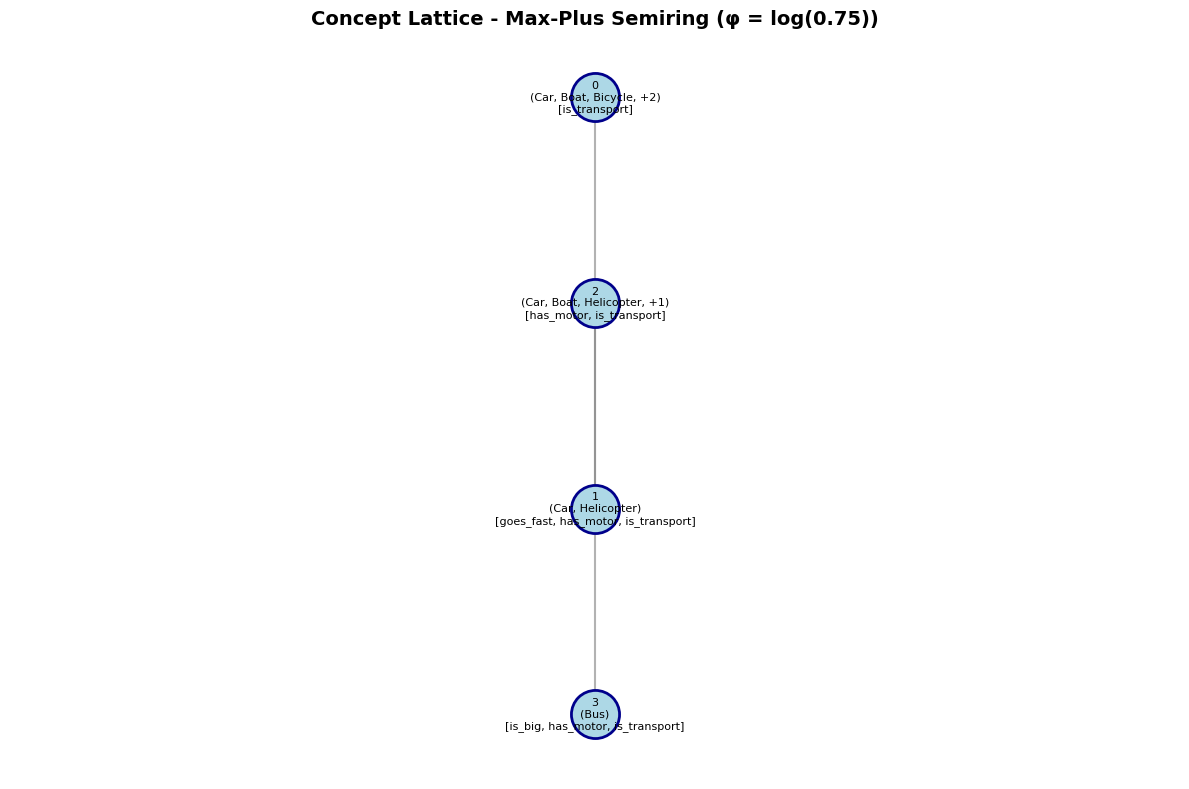

In [11]:
# Visualize Max-Plus lattice
fig = plot_lattice(maxplus_lattice, figsize=(12, 8), layout="hierarchical",
                   title="Concept Lattice - Max-Plus Semiring (φ = log(0.75))")
plt.tight_layout()
plt.show()

### Max-Plus Analysis

**Key Observations**:
- Preserves continuous information via log-transformation
- **max operation** emphasizes strongest attributes
- Car and Helicopter are now distinguished (different log values)
- Good for optimization and "best of" scenarios
- More expressive than Boolean

## 4. Fuzzy FCA via α-cuts

**Approach**: Apply α-cuts to create crisp (binary) relations at different membership levels

**Semiring**: Boolean (applied to α-cut relations)

**α-cut**: For threshold α, include (object, attribute) if relation value ≥ α

**Main α**: 0.75 (same as Boolean threshold for comparison)

**Key Idea**: Create a **hierarchy of lattices** at different confidence levels

In [12]:
# Apply α-cut at 0.75
alpha = 0.75
alpha_cut_relation = (relation >= alpha).astype(object).astype(int)

print(f"Fuzzy FCA with α-cut = {alpha}")
print("=" * 60)
print()
print("α-cut creates a crisp (binary) relation:")
print(f"  R_α = {{(vehicle, attr) | R(vehicle, attr) ≥ {alpha}}}")
print()

df_alpha = pd.DataFrame(alpha_cut_relation, index=vehicles, columns=attributes)
print(df_alpha)

Fuzzy FCA with α-cut = 0.75

α-cut creates a crisp (binary) relation:
  R_α = {(vehicle, attr) | R(vehicle, attr) ≥ 0.75}

            goes_fast  is_big  has_motor  is_transport
Car                 1       0          1             1
Boat                0       0          1             1
Bicycle             0       0          0             1
Helicopter          1       0          1             1
Bus                 0       1          1             1


In [13]:
# Create Fuzzy context (using Boolean semiring on α-cut)
fuzzy_context = KValuedContext(vehicles, attributes, alpha_cut_relation, BooleanSemiring())
fuzzy_galois = GaloisConnection(fuzzy_context, pivot=1)
fuzzy_lattice = ConceptLattice(fuzzy_context, fuzzy_galois, method="objects")

print(f"Fuzzy FCA (α = {alpha}): Found {len(fuzzy_lattice)} concepts")
print("=" * 60)
print()

# Display all concepts
for i in range(len(fuzzy_lattice)):
    objs = fuzzy_lattice.get_concept_objects(i)
    attrs = fuzzy_lattice.get_concept_attributes(i)
    
    print(f"Concept #{i}:")
    print(f"  Extent (Vehicles):   {objs if objs else '∅'}")
    print(f"  Intent (Attributes): {attrs if attrs else '∅'}")
    print()

Fuzzy FCA (α = 0.75): Found 5 concepts

Concept #0:
  Extent (Vehicles):   ['Car', 'Boat', 'Bicycle', 'Helicopter', 'Bus']
  Intent (Attributes): ['is_transport']

Concept #1:
  Extent (Vehicles):   ['Car', 'Helicopter']
  Intent (Attributes): ['goes_fast', 'has_motor', 'is_transport']

Concept #2:
  Extent (Vehicles):   ['Car', 'Boat', 'Helicopter', 'Bus']
  Intent (Attributes): ['has_motor', 'is_transport']

Concept #3:
  Extent (Vehicles):   ['Bus']
  Intent (Attributes): ['is_big', 'has_motor', 'is_transport']

Concept #4:
  Extent (Vehicles):   ∅
  Intent (Attributes): ['goes_fast', 'is_big', 'has_motor', 'is_transport']



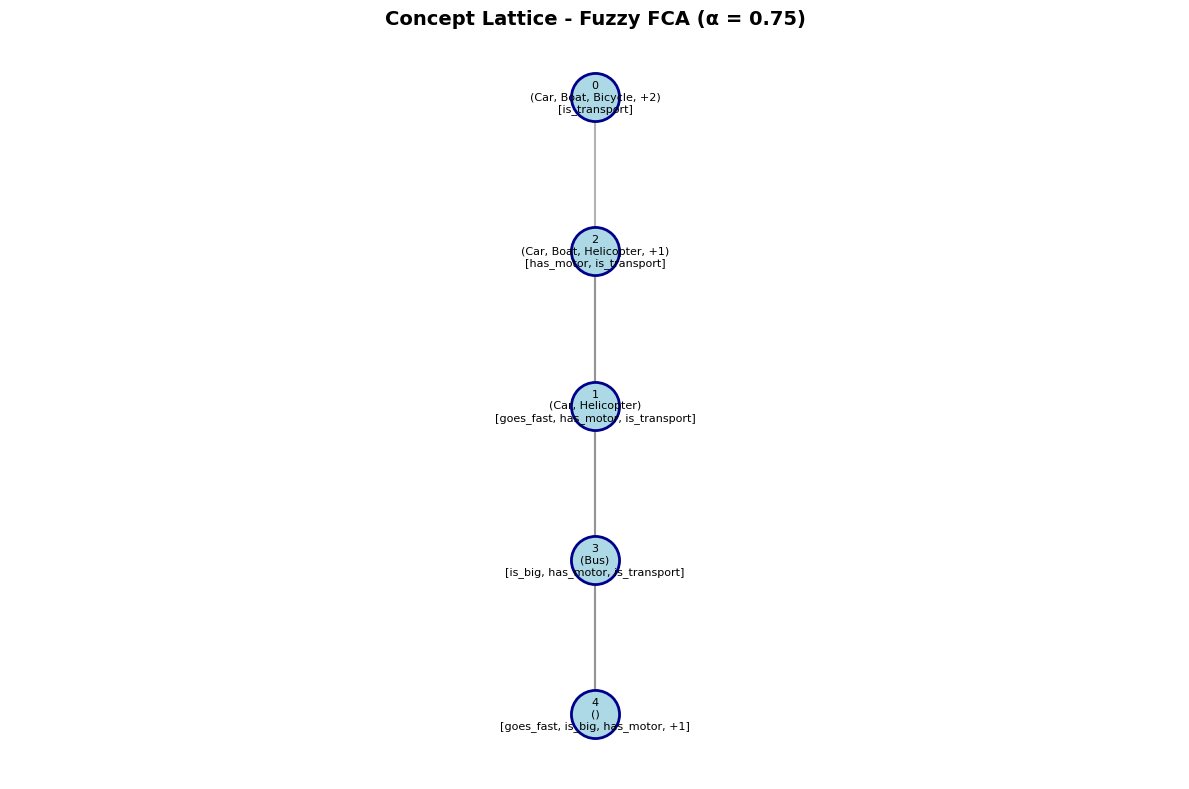

In [14]:
# Visualize Fuzzy lattice
fig = plot_lattice(fuzzy_lattice, figsize=(12, 8), layout="hierarchical",
                   title=f"Concept Lattice - Fuzzy FCA (α = {alpha})")
plt.tight_layout()
plt.show()

### Fuzzy α-cut Hierarchy

The power of Fuzzy FCA is exploring **multiple α levels** to see concepts at different confidence thresholds.

In [15]:
# Explore multiple α-cuts
print("Fuzzy FCA: Concept Hierarchy at Different α Levels")
print("=" * 60)
print()

alpha_values = [0.0, 0.25, 0.5, 0.75, 1.0]
fuzzy_results = []

for alpha in alpha_values:
    # Apply α-cut
    alpha_rel = (relation >= alpha).astype(object).astype(int)
    ctx = KValuedContext(vehicles, attributes, alpha_rel, BooleanSemiring())
    gal = GaloisConnection(ctx, pivot=1)
    lat = ConceptLattice(ctx, gal, method="objects")
    
    fuzzy_results.append((alpha, len(lat)))
    
    # Describe
    if alpha == 0.0:
        desc = "All relations included (very loose)"
    elif alpha == 0.25:
        desc = "Low confidence threshold (inclusive)"
    elif alpha == 0.5:
        desc = "Medium confidence threshold"
    elif alpha == 0.75:
        desc = "High confidence threshold (restrictive)"
    else:
        desc = "Only exact matches (very restrictive)"
    
    print(f"α = {alpha:4.2f}: {len(lat):2d} concepts  - {desc}")

print()
print("Observation: As α increases, different concept structures emerge!")

Fuzzy FCA: Concept Hierarchy at Different α Levels

α = 0.00:  1 concepts  - All relations included (very loose)
α = 0.25:  2 concepts  - Low confidence threshold (inclusive)
α = 0.50:  2 concepts  - Medium confidence threshold
α = 0.75:  5 concepts  - High confidence threshold (restrictive)
α = 1.00:  5 concepts  - Only exact matches (very restrictive)

Observation: As α increases, different concept structures emerge!


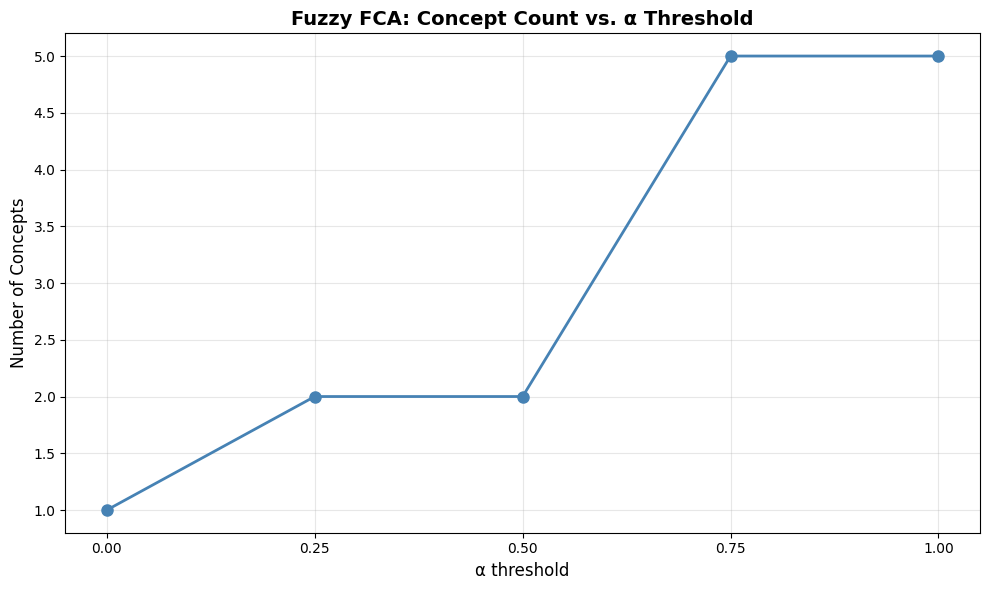

This hierarchy shows how concepts emerge at different confidence levels!


In [16]:
# Visualize α hierarchy
alphas, counts = zip(*fuzzy_results)

plt.figure(figsize=(10, 6))
plt.plot(alphas, counts, 'o-', linewidth=2, markersize=8, color='steelblue')
plt.xlabel('α threshold', fontsize=12)
plt.ylabel('Number of Concepts', fontsize=12)
plt.title('Fuzzy FCA: Concept Count vs. α Threshold', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(alphas)
plt.tight_layout()
plt.show()

print("This hierarchy shows how concepts emerge at different confidence levels!")

### Fuzzy Analysis

**Key Observations**:
- At α = 0.75, same result as Boolean (both use threshold 0.75)
- **Hierarchy** reveals concepts at different confidence levels
- Lower α: More inclusive, fewer fine-grained concepts
- Higher α: More restrictive, more specialized concepts
- Most natural interpretation for fuzzy membership degrees

## 5. Side-by-Side Comparison

Let's compare all three approaches on the same dataset.

In [17]:
# Comparison table
print("SEMIRING COMPARISON SUMMARY")
print("=" * 80)
print()

comparison = [
    ["Approach", "Semiring", "φ/α", "Data Transform", "# Concepts", "Key Feature"],
    ["-" * 12, "-" * 15, "-" * 6, "-" * 18, "-" * 10, "-" * 30],
    ["Boolean", "Boolean", "0.75", "Binary {0,1}", f"{len(boolean_lattice)}", "Hard cutoff, simple"],
    ["Max-Plus", "Max-Plus", "0.75", "Log-scaled ℝ", f"{len(maxplus_lattice)}", "Preserves continuity, max"],
    ["Fuzzy", "Boolean+α-cut", "0.75", "α-cut binary", f"{len(fuzzy_lattice)}", "Hierarchy of confidence"],
]

for row in comparison:
    print(f"{row[0]:12s} | {row[1]:15s} | {row[2]:6s} | {row[3]:18s} | {row[4]:10s} | {row[5]:30s}")

print()
print("Note: At single α=0.75, Fuzzy gives same result as Boolean.")
print("      Fuzzy's advantage is the hierarchy across multiple α values.")

SEMIRING COMPARISON SUMMARY

Approach     | Semiring        | φ/α    | Data Transform     | # Concepts | Key Feature                   
------------ | --------------- | ------ | ------------------ | ---------- | ------------------------------
Boolean      | Boolean         | 0.75   | Binary {0,1}       | 5          | Hard cutoff, simple           
Max-Plus     | Max-Plus        | 0.75   | Log-scaled ℝ       | 4          | Preserves continuity, max     
Fuzzy        | Boolean+α-cut   | 0.75   | α-cut binary       | 5          | Hierarchy of confidence       

Note: At single α=0.75, Fuzzy gives same result as Boolean.
      Fuzzy's advantage is the hierarchy across multiple α values.


### Detailed Example: "Which vehicles are fast AND have a motor?"

Let's trace through each semiring to see how they group vehicles.

In [18]:
print("Query: Which vehicles have 'goes_fast' AND 'has_motor' at high degree?")
print("=" * 80)
print()

print("Original continuous values:")
print("-" * 80)
for i, veh in enumerate(vehicles):
    fast = relation[i, 0]
    motor = relation[i, 2]
    print(f"{veh:12s}: goes_fast={fast:.2f}, has_motor={motor:.2f}")

print()
print("Boolean (threshold 0.75):")
print("-" * 80)
for i, veh in enumerate(vehicles):
    fast_bin = binary_relation[i, 0]
    motor_bin = binary_relation[i, 2]
    result = "✓ YES" if (fast_bin == 1 and motor_bin == 1) else "✗ no"
    print(f"{veh:12s}: fast={fast_bin}, motor={motor_bin}  → {result}")

print()
print("Max-Plus (pivot log(0.75) ≈ -0.288):")
print("-" * 80)
for i, veh in enumerate(vehicles):
    fast_log = maxplus_relation[i, 0]
    motor_log = maxplus_relation[i, 2]
    # Both >= pivot?
    result = "✓ YES" if (fast_log >= phi_maxplus and motor_log >= phi_maxplus) else "✗ no"
    print(f"{veh:12s}: fast={fast_log:.3f}, motor={motor_log:.3f}  → {result}")

print()
print("Fuzzy (α=0.75):")
print("-" * 80)
print("Same as Boolean at this α level.")
print()
print("But at α=0.50:")
alpha_50 = (relation >= 0.5).astype(int)
for i, veh in enumerate(vehicles):
    fast_50 = alpha_50[i, 0]
    motor_50 = alpha_50[i, 2]
    result = "✓ YES" if (fast_50 == 1 and motor_50 == 1) else "✗ no"
    print(f"{veh:12s}: fast={fast_50}, motor={motor_50}  → {result}")

Query: Which vehicles have 'goes_fast' AND 'has_motor' at high degree?

Original continuous values:
--------------------------------------------------------------------------------
Car         : goes_fast=1.00, has_motor=1.00
Boat        : goes_fast=0.50, has_motor=1.00
Bicycle     : goes_fast=0.25, has_motor=0.00
Helicopter  : goes_fast=0.75, has_motor=1.00
Bus         : goes_fast=0.50, has_motor=1.00

Boolean (threshold 0.75):
--------------------------------------------------------------------------------
Car         : fast=1, motor=1  → ✓ YES
Boat        : fast=0, motor=1  → ✗ no
Bicycle     : fast=0, motor=0  → ✗ no
Helicopter  : fast=1, motor=1  → ✓ YES
Bus         : fast=0, motor=1  → ✗ no

Max-Plus (pivot log(0.75) ≈ -0.288):
--------------------------------------------------------------------------------
Car         : fast=0.000, motor=0.000  → ✓ YES
Boat        : fast=-0.693, motor=0.000  → ✗ no
Bicycle     : fast=-1.386, motor=-inf  → ✗ no
Helicopter  : fast=-0.288, motor=0.

## 6. Summary & Conclusions

### When to Use Each Semiring

#### 1. Boolean Semiring
**Best for:**
- ✅ Binary classification tasks
- ✅ When you need simple yes/no answers
- ✅ Standard FCA literature and tools

**Limitations:**
- ❌ Loses continuous information
- ❌ Hard threshold can be arbitrary
- ❌ 0.74 and 0.76 treated very differently

#### 2. Max-Plus Semiring (Tropical)
**Best for:**
- ✅ Optimization problems
- ✅ Ranking and "best of" scenarios
- ✅ When strongest attributes should dominate
- ✅ Preserving continuous information

**Limitations:**
- ❌ Less intuitive (log space)
- ❌ Requires understanding of tropical algebra
- ❌ Can produce different concept counts

#### 3. Fuzzy FCA (α-cuts)
**Best for:**
- ✅ Exploring data at multiple confidence levels
- ✅ Degrees of membership / fuzzy logic
- ✅ Understanding how concepts emerge
- ✅ Most natural for continuous fuzzy data

**Limitations:**
- ❌ Need to analyze multiple α levels
- ❌ More complex presentation
- ❌ Each α gives a separate lattice

### Key Takeaway

**Different semirings reveal different structural insights from the same data!**

- **Boolean**: Simplicity and clarity
- **Max-Plus**: Optimization and continuous preservation
- **Fuzzy**: Hierarchical confidence levels

Choose based on your application domain and what insights you want to extract.

## Appendix: Technical Details

### Why log-transform for Max-Plus?

Max-Plus multiplication is **addition** (+), not regular multiplication (×). The log-transform converts:
- Multiplication: `a × b` → Addition: `log(a) + log(b)`
- This is natural for the semiring structure
- Preserves order: `a > b` → `log(a) > log(b)`

### Why α-cuts for Fuzzy?

The current K-FCA implementation stores fuzzy degrees in extent/intent vectors, but the lattice algorithm expects binary membership. α-cuts solve this by:
- Creating crisp (binary) relations at each level
- Applying standard FCA to each level
- Building a hierarchy of lattices

This is the standard approach in fuzzy FCA literature!